Î≤ïÏ†ïÍ∞ÄÏ∂ïÏ†ÑÏóºÎ≥ë Î∞úÏÉùÌÜµÍ≥Ñ
1995 59
1996 393
1997 260
1998 230
1999 48
2000 21,549
2001 27,787
2002 30,155
2003 48,657
2004 15,833
2005 10,862
2006 18,608
2007 15,682
2008 13,857
2009 9,717
2010 4,573
2011 1,342
2012 1,454
2013 5,474
2014 36,108
2015 18,988
2016 9,610
2017 7,586
2018 35,078
2019 29,342
2020 4,679
2021 5,791
2022 21,351
2023 9,026


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46076 (\N{HANGUL SYLLABLE DWAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGU

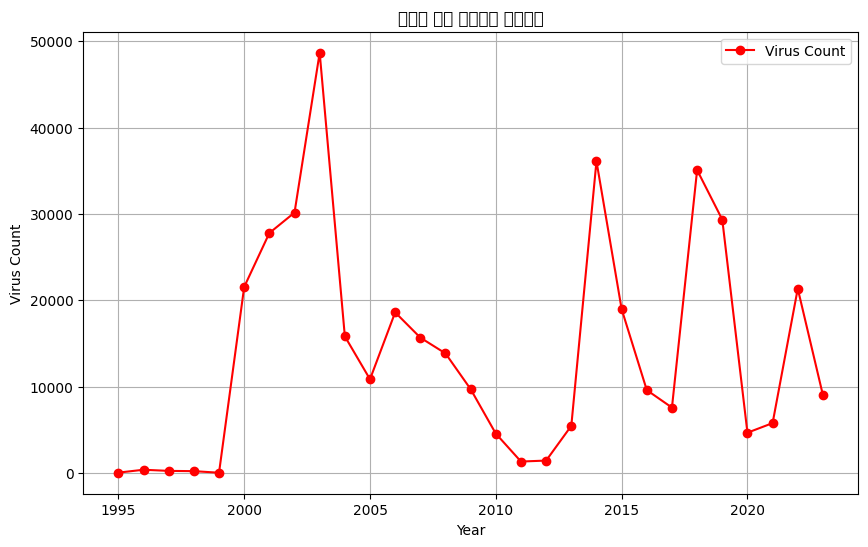

In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import os
import sys
import requests
import urllib
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd

url  = "https://home.kahis.go.kr/home/lkntscrinfo/selectLkntsStats.do"

chrome_options = Options()
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

# Set up the WebDriver 
#service = Service(executable_path="/Users/sungyoon/Desktop/test_file/chromedriver-mac-arm64/chromedriver") 
service = Service(executable_path="/home/sungyoon/chromedriver-linux64/chromedriver") 
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get(url)

time.sleep(3)

print(driver.title)

driver.maximize_window()

element1 = driver.find_element(By.CSS_SELECTOR, "#occrFromDtId")
element1.click()
element1.send_keys("19950101")

element2 = driver.find_element(By.CSS_SELECTOR, "#occrToDtId")
element2.click()
element2.send_keys("20231231")

element3 = driver.find_element(By.CSS_SELECTOR, "#lstkspClId > option:nth-child(10)")
element3.click()

time.sleep(1)
search_btn = driver.find_element(By.CSS_SELECTOR, "#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(1) > tbody > tr > td:nth-child(3) > a > img")
search_btn.click()

for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    print(year, Virus_count.text)

# Create a list to store the data
data = []

# Collect data for each year
for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    data.append({"Year": year, "Virus Count": Virus_count.text})

# Create a DataFrame
df_virus = pd.DataFrame(data)

# Display the DataFrame

driver.quit()

import matplotlib.pyplot as plt

# Ensure Virus Count is numeric for sorting and plotting
df_virus['Virus Count'] = df_virus['Virus Count'].str.replace(',', '').astype(int)

# Sort the DataFrame by Year to ensure correct order
df_virus = df_virus.sort_values(by='Year')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_virus['Year'], df_virus['Virus Count'], marker='o', linestyle='-', color='r', label='Virus Count')

plt.xlabel('Year')
plt.ylabel('Virus Count')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèºÏßÄ Î∞îÏù¥Îü¨Ïä§ Î∞úÏÉùÌÜµÍ≥Ñ')
plt.grid(True)
plt.legend()

plt.show()


      Ïó∞ÎèÑ    ÎèÑÏ∂ïÍ∞Ä
0   1993  2,151
1   1994  2,373
2   1995  2,298
3   1996  2,490
4   1997  2,422
5   1998  2,514
6   1999  3,017
7   2000  2,499
8   2001  2,599
9   2002  2,645
10  2003  2,444
11  2004  3,479
12  2005  3,730
13  2006  3,649
14  2007  3,247
15  2008  4,046
16  2009  4,449
17  2010  4,232
18  2011  5,808
19  2012  3,974
20  2013  3,570
21  2014  4,741
22  2015  4,939
23  2016  4,617
24  2017  4,947
25  2018  4,362
26  2019  3,843
27  2020  4,216
28  2021  4,722
29  2022  5,227
30  2023  5,134
31  2024  5,239


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SY

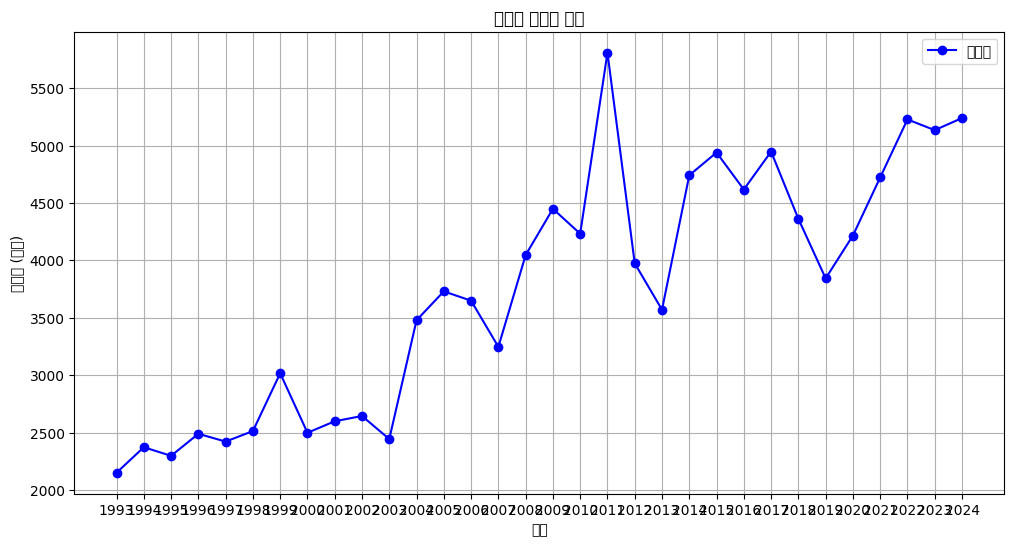

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL
url = "http://www.kmta.or.kr/kr/data/stats_price_year.php"

# ÏöîÏ≤≠
response = requests.get(url)
response.encoding = 'utf-8'

# ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')

# Ìëú ÏÑ†ÌÉù
table = soup.select_one("div.contents.p_stats > table")
rows = table.select("tr")

# Ïó∞ÎèÑ Î∞è Í∞í ÏàòÏßë
data = []
start_year = 1993
for i, row in enumerate(rows[2:], start=0):  # Ìó§Îçî 2Ï§Ñ Í±¥ÎÑàÎúÄ
    if start_year + i > 2024:
        break  # 2024ÎÖÑÍπåÏßÄÎßå
    cells = row.find_all("td")
    if len(cells) >= 4:
        value = cells[3].get_text(strip=True)
        year = start_year + i
        data.append({"Ïó∞ÎèÑ": f"{year}", "ÎèÑÏ∂ïÍ∞Ä": value})

# DataFrame ÏÉùÏÑ±
df_price = pd.DataFrame(data)

# Ï∂úÎ†•
print(df_price)

import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î≥ÄÌôò: ÎèÑÏ∂ïÍ∞Ä Í∞íÏùÑ Ïà´ÏûêÎ°ú Î≥ÄÌôò
df_price['ÎèÑÏ∂ïÍ∞Ä'] = df_price['ÎèÑÏ∂ïÍ∞Ä'].str.replace(',', '').astype(int)

# ÌîåÎ°úÏö∞Ï∞®Ìä∏ ÏÉùÏÑ±
plt.figure(figsize=(12, 6))
plt.plot(df_price['Ïó∞ÎèÑ'], df_price['ÎèÑÏ∂ïÍ∞Ä'], marker='o', linestyle='-', color='b', label='ÎèÑÏ∂ïÍ∞Ä')

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞
plt.xlabel('Ïó∞ÎèÑ')
plt.ylabel('ÎèÑÏ∂ïÍ∞Ä (Ï≤úÏõê)')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÎèÑÏ∂ïÍ∞Ä Î≥ÄÌôî')
plt.grid(True)
plt.legend()

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

/tmp/ipykernel_51051/32571349.py:34: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/32571349.py:34: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/32571349.py:34: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/32571349.py:34: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/32571349.py:34: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/32571349.py:34: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/32571349.py:34: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/

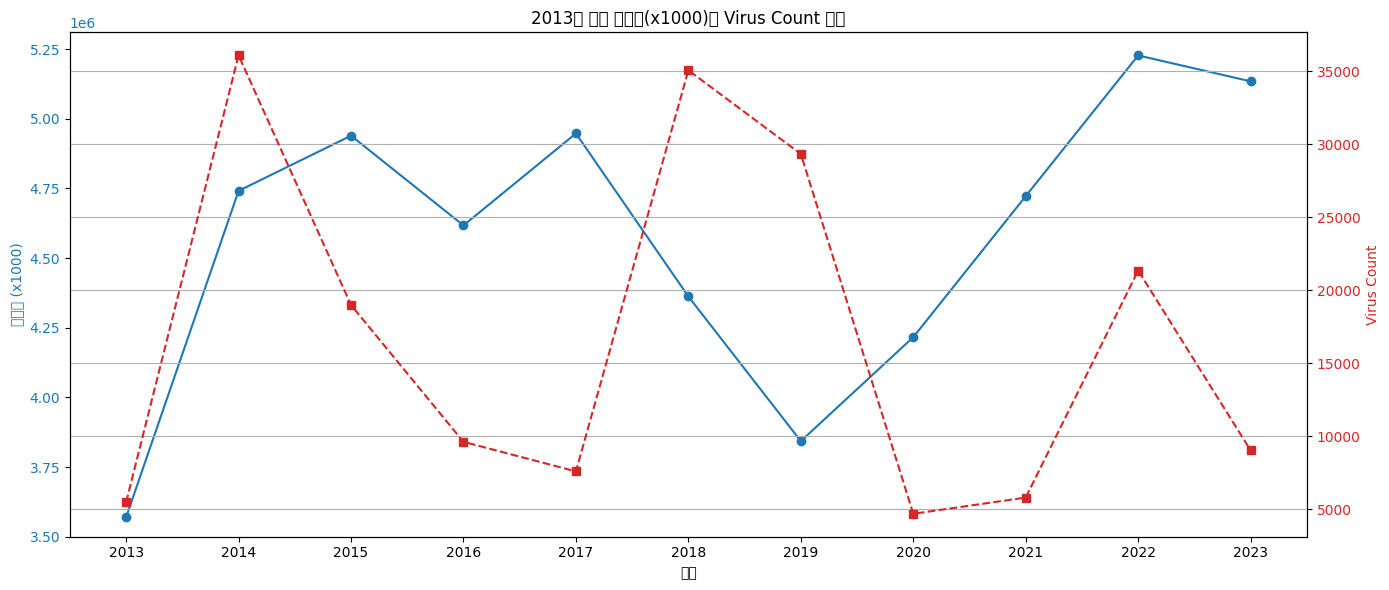

ÏÉÅÍ¥ÄÍ≥ÑÏàò:
                  ÎèÑÏ∂ïÍ∞Ä  Virus Count
ÎèÑÏ∂ïÍ∞Ä          1.000000    -0.001025
Virus Count -0.001025     1.000000


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['Ïó∞ÎèÑ'] = df_price['Ïó∞ÎèÑ'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# Î≥ëÌï©
df_merged = pd.merge(df_price, df_virus, left_on='Ïó∞ÎèÑ', right_on='Year')

# ‚úÖ 2013ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÏÑ†ÌÉù
df_merged = df_merged[df_merged['Ïó∞ÎèÑ'] >= 2013]

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
fig, ax1 = plt.subplots(figsize=(14, 6))

# Ï≤´ Î≤àÏß∏ yÏ∂ï (ÏôºÏ™Ω): ÎèÑÏ∂ïÍ∞Ä (Îã®ÏúÑ √ó1000)
color = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (x1000)', color=color)
ax1.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÎèÑÏ∂ïÍ∞Ä'] * 1000, marker='o', linestyle='-', color=color, label='ÎèÑÏ∂ïÍ∞Ä (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['Ïó∞ÎèÑ'])
ax1.set_ylim(bottom=3500 * 1000)  # yÏ∂ï Î≤îÏúÑ Ï°∞Ï†à

# Îëê Î≤àÏß∏ yÏ∂ï (Ïò§Î•∏Ï™Ω): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['Ïó∞ÎèÑ'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# Í∑∏ÎûòÌîÑ Ï†úÎ™© Î∞è Íæ∏ÎØ∏Í∏∞
plt.title('2013ÎÖÑ Ïù¥ÌõÑ ÎèÑÏ∂ïÍ∞Ä(x1000)ÏôÄ Virus Count Î≥ÄÌôî')
fig.tight_layout()
plt.grid(True)

# Í∑∏ÎûòÌîÑ ÌëúÏãú
plt.show()

# ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù
correlation = df_merged[['ÎèÑÏ∂ïÍ∞Ä', 'Virus Count']].corr()
print("ÏÉÅÍ¥ÄÍ≥ÑÏàò:")
print(correlation)


/tmp/ipykernel_51051/4222974915.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_feed = pd.read_sql(query, conn)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core

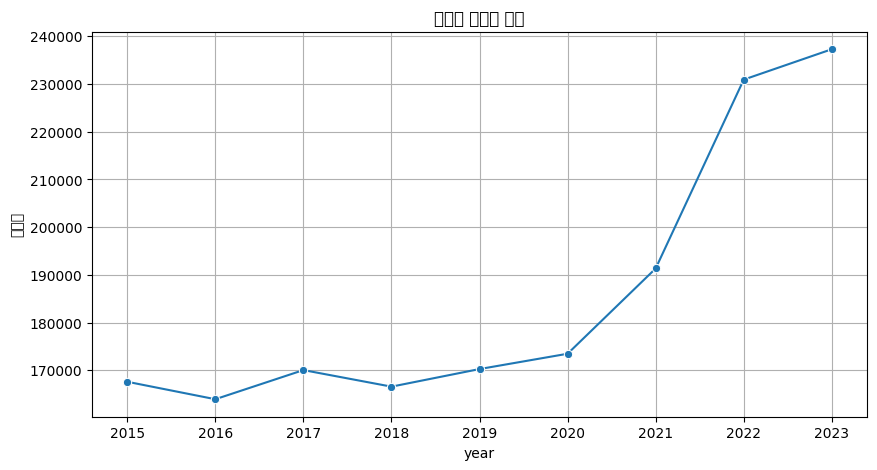

/tmp/ipykernel_51051/4222974915.py:65: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/4222974915.py:65: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/4222974915.py:65: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/4222974915.py:65: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/4222974915.py:65: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/4222974915.py:65: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/4222974915.py:65: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.t

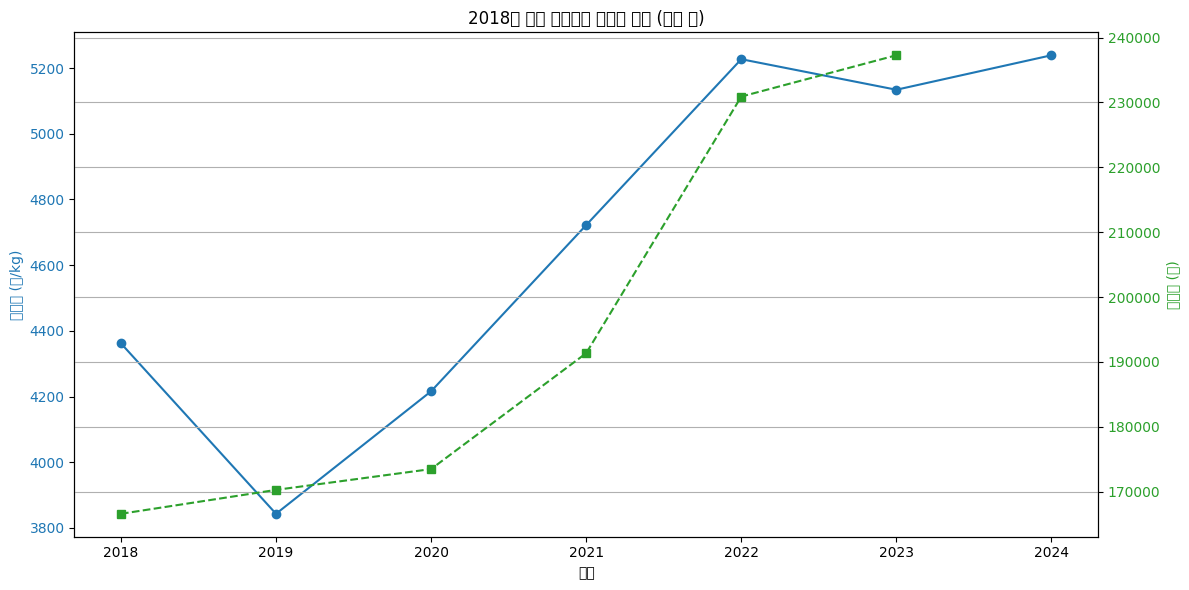

In [ ]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

#  RDS Ï†ëÏÜç Ï†ïÎ≥¥
conn = pymysql.connect(
    host='database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='psy',
    password='0000',
    database='pig',
    charset='utf8mb4'
)

# feed ÌÖåÏù¥Î∏î Î∂àÎü¨Ïò§Í∏∞ (ÏÇ¨Î£åÎπÑ)
query = "SELECT * FROM feed"
df_feed = pd.read_sql(query, conn)

# Ïó∞Í≤∞ Ï¢ÖÎ£å
conn.close()

# Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† ÏÇ¨Î£åÎπÑ Í≥ÑÏÇ∞
yearly_feed = df_feed.groupby('year').mean(numeric_only=True).reset_index()

# ÎèÑÏ∂ïÍ∞Ä Ï†ÑÏ≤òÎ¶¨ (df_priceÍ∞Ä ÎØ∏Î¶¨ Î°úÎìúÎêòÏñ¥ ÏûàÎã§Í≥† Í∞ÄÏ†ï)
df_price['ÎèÑÏ∂ïÍ∞Ä'] = pd.to_numeric(
    df_price['ÎèÑÏ∂ïÍ∞Ä'].astype(str).str.replace(',', ''), errors='coerce'
)

# ÏãúÍ∞ÅÌôî: ÏÇ¨Î£åÎπÑ Îã®ÎèÖ Ï∂îÏù¥
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_feed, x='year', y='ÏÇ¨Î£åÎπÑ', marker='o')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÏÇ¨Î£åÎπÑ Ï∂îÏù¥')
plt.grid(True)
plt.show()

df_price['Ïó∞ÎèÑ'] = pd.to_numeric(df_price['Ïó∞ÎèÑ'], errors='coerce')

# 2018ÎÖÑ Ïù¥ÌõÑ Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÎßÅ
df_price_filtered = df_price[df_price['Ïó∞ÎèÑ'] >= 2018]
yearly_feed_filtered = yearly_feed[yearly_feed['year'] >= 2018]


# Ïù¥Ï§ë yÏ∂ï Í∑∏ÎûòÌîÑ
fig, ax1 = plt.subplots(figsize=(12, 6))

# ÎèÑÏ∂ïÍ∞Ä (ÏôºÏ™Ω yÏ∂ï)
color1 = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)', color=color1)
ax1.plot(df_price_filtered['Ïó∞ÎèÑ'], df_price_filtered['ÎèÑÏ∂ïÍ∞Ä'], marker='o', linestyle='-', color=color1, label='ÎèÑÏ∂ïÍ∞Ä')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_price_filtered['Ïó∞ÎèÑ'])

# ÏÇ¨Î£åÎπÑ (Ïò§Î•∏Ï™Ω yÏ∂ï)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('ÏÇ¨Î£åÎπÑ (Ïõê)', color=color2)
ax2.plot(yearly_feed_filtered['year'], yearly_feed_filtered['ÏÇ¨Î£åÎπÑ'], marker='s', linestyle='--', color=color2, label='ÏÇ¨Î£åÎπÑ')
ax2.tick_params(axis='y', labelcolor=color2)

# Ï†úÎ™© Î∞è Íæ∏ÎØ∏Í∏∞
plt.title('2018ÎÖÑ Ïù¥ÌõÑ ÎèÑÏ∂ïÍ∞ÄÏôÄ ÏÇ¨Î£åÎπÑ Î≥ÄÌôî (Ïù¥Ï§ë Ï∂ï)')
fig.tight_layout()
plt.grid(True)
plt.show()


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
/tmp/ipykernel_49788/946236424.py:72: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout ()
/tmp/ipy

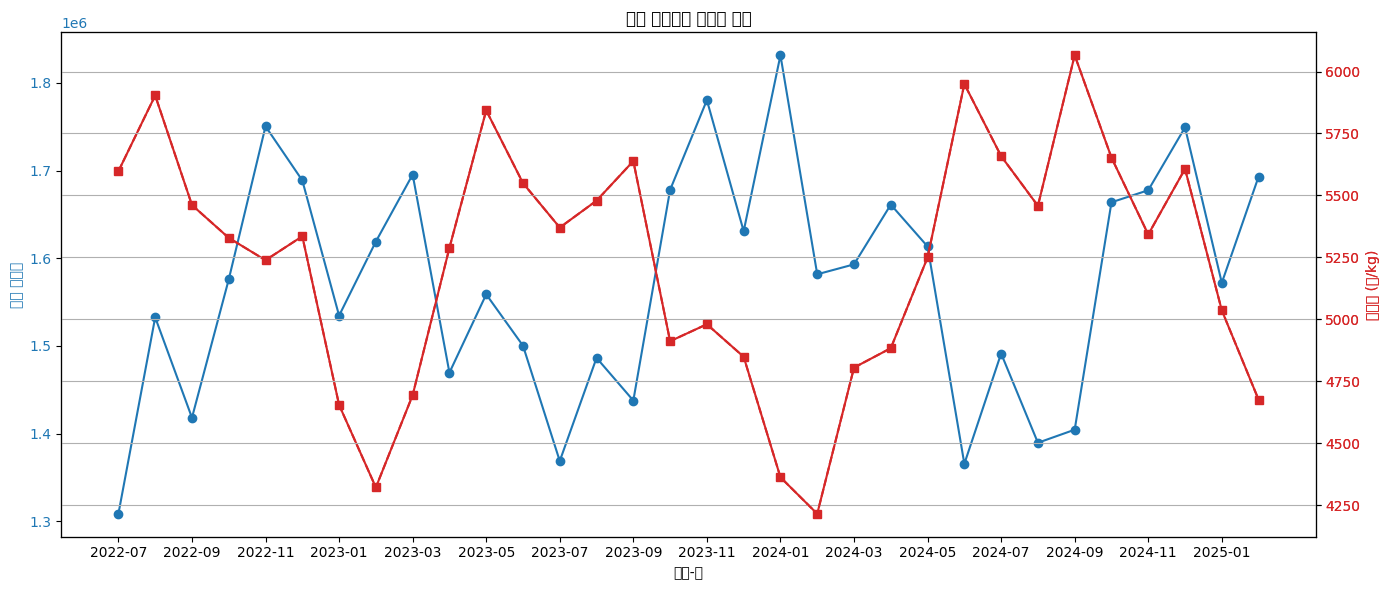

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
rc('font', family='AppleGothic')

# ÏùåÏàò Í∏∞Ìò∏ Íπ®Ïßê Î∞©ÏßÄ
plt.rcParams['axes.unicode_minus'] = False


# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
pig_df = pd.read_excel("/home/sungyoon/project_file/pig.xlsx", sheet_name='Îç∞Ïù¥ÌÑ∞')
price_df = pd.read_excel("/home/sungyoon/project_file/report.xltx", sheet_name=None)  # Î™®Îì† ÏãúÌä∏ Î∂àÎü¨Ïò§Í∏∞
# Îß•Î∂Å Ï£ºÏÜå/Users/sungyoon/Desktop/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥

# 2. Ï∂úÌïòÎüâ Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
pig_df['Ïó∞ÏõîÏùº'] = pd.to_datetime(pig_df['Ïó∞ÏõîÏùº'])
pig_df['Ïó∞ÎèÑ-Ïõî'] = pig_df['Ïó∞ÏõîÏùº'].dt.to_period('M')
monthly_pig = pig_df.groupby('Ïó∞ÎèÑ-Ïõî')['Ï∂úÌïòÎßàÎ¶øÏàò'].sum().reset_index()
monthly_pig['Ïó∞ÎèÑ-Ïõî'] = monthly_pig['Ïó∞ÎèÑ-Ïõî'].astype(str)

# 3. ÎèÑÏ∂ïÍ∞Ä Î™®Îì† ÏãúÌä∏ ÌÜµÌï©
all_price = []
for name, sheet in price_df.items():
    try:
        df = sheet[sheet['Í≤ΩÎùΩÏùºÏûê'].notna()].copy()
        df['Í≤ΩÎùΩÏùºÏûê'] = pd.to_datetime(df['Í≤ΩÎùΩÏùºÏûê'], errors='coerce')
        df['ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)'] = pd.to_numeric(
            df['ÌèâÍ∑†'].astype(str).str.replace(',', '').str.strip(), errors='coerce')
        all_price.append(df[['Í≤ΩÎùΩÏùºÏûê', 'ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)']])
    except:
        continue

merged_price_df = pd.concat(all_price).dropna().reset_index(drop=True)
merged_price_df['Ïó∞ÎèÑ-Ïõî'] = merged_price_df['Í≤ΩÎùΩÏùºÏûê'].dt.to_period('M')
monthly_price = merged_price_df.groupby('Ïó∞ÎèÑ-Ïõî')['ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)'].mean().reset_index()
monthly_price['Ïó∞ÎèÑ-Ïõî'] = monthly_price['Ïó∞ÎèÑ-Ïõî'].astype(str)

# 4. Î≥ëÌï© Î∞è ÌïÑÌÑ∞ÎßÅ (2022ÎÖÑ 7Ïõî Ïù¥ÌõÑ)
merged = pd.merge(monthly_pig, monthly_price, on='Ïó∞ÎèÑ-Ïõî', how='inner')
merged = merged[merged['Ïó∞ÎèÑ-Ïõî'] >= '2022-07']

# 5. Ïù¥Ï§ë yÏ∂ï Í∑∏ÎûòÌîÑ Í∑∏Î¶¨Í∏∞
fig, ax1 = plt.subplots(figsize=(14, 6))

# Ï∂úÌïòÎüâ (ÏôºÏ™Ω yÏ∂ï)
color1 = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ-Ïõî')
ax1.set_ylabel('Ï∂úÌïò ÎßàÎ¶øÏàò', color=color1)
ax1.plot(merged['Ïó∞ÎèÑ-Ïõî'], merged['Ï∂úÌïòÎßàÎ¶øÏàò'], color=color1, marker='o', label='Ï∂úÌïò ÎßàÎ¶øÏàò')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(merged['Ïó∞ÎèÑ-Ïõî'][::2])
ax1.set_xticklabels(merged['Ïó∞ÎèÑ-Ïõî'][::2])


# ÎèÑÏ∂ïÍ∞Ä (Ïò§Î•∏Ï™Ω yÏ∂ï)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)', color=color2)
ax2.plot(merged['Ïó∞ÎèÑ-Ïõî'], merged['ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)'], color=color2, linestyle='-', label='ÎèÑÏ∂ïÍ∞Ä')  # Ï†ê ÎåÄÏã† ÏÑ†ÏúºÎ°ú Î≥ÄÍ≤Ω
ax2.tick_params(axis='y', labelcolor=color2)
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)', color=color2)
ax2.plot(merged['Ïó∞ÎèÑ-Ïõî'], merged['ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)'], color=color2, marker='s', linestyle='--', label='ÎèÑÏ∂ïÍ∞Ä')
ax2.tick_params(axis='y', labelcolor=color2)

# Ï†úÎ™© Î∞è Íæ∏ÎØ∏Í∏∞
plt.title('Ï∂úÌïò ÎßàÎ¶øÏàòÏôÄ ÎèÑÏ∂ïÍ∞Ä ÎπÑÍµê')
plt.grid(True)
fig.tight_layout ()
plt.show()


/tmp/ipykernel_51051/3503321604.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pyla

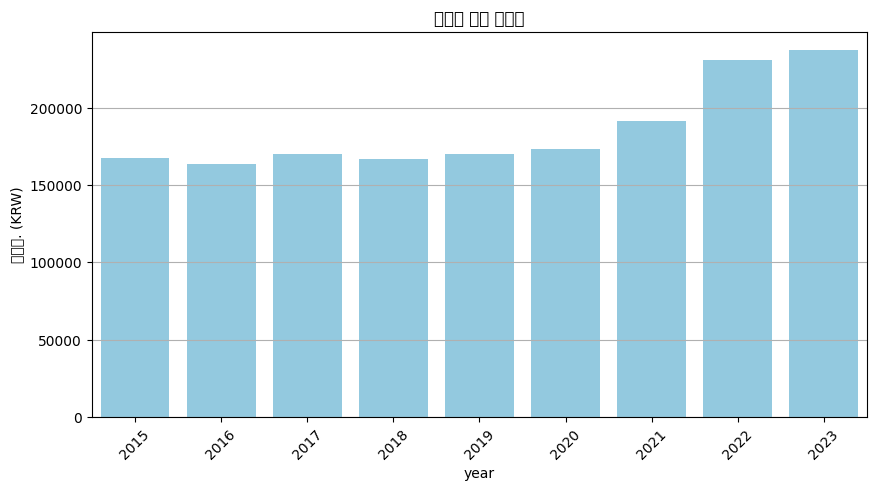

/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SY

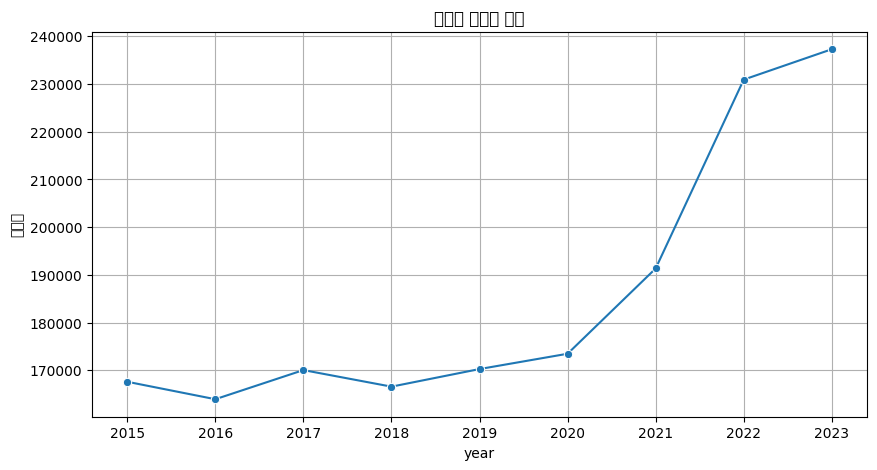

In [6]:
import pandas as pd
import pymysql  # ÎòêÎäî psycopg2 for PostgreSQL

# RDS Ï†ëÏÜç Ï†ïÎ≥¥ (ÏòàÏãú)
host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com'
port = 3306
user = 'psy'
password = '0000'
database = 'pig'

# Ïó∞Í≤∞
conn = pymysql.connect(
    host=host,
    port=port,
    user=user,
    password=password,
    database=database,
    charset='utf8mb4'
)

# SQL ÏøºÎ¶¨ Ïã§Ìñâ
query = "SELECT * FROM feed"
df = pd.read_sql(query, conn)

# Ïó∞Í≤∞ Ï¢ÖÎ£å
conn.close()

yearly = df.groupby('year').mean(numeric_only=True).reset_index()


import matplotlib.pyplot as plt
import seaborn as sns

# Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† Îç∞Ïù¥ÌÑ∞Î°ú Ï†ïÎ¶¨
yearly = df.groupby('year').mean(numeric_only=True).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=yearly, x='year', y='ÏÇ¨Î£åÎπÑ', color='skyblue')
plt.title("Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† ÏÇ¨Î£åÎπÑ")
plt.ylabel("ÏÇ¨Î£åÎπÑ."
" (KRW)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly, x='year', y='ÏÇ¨Î£åÎπÑ', marker='o')
plt.title('Ïó∞ÎèÑÎ≥Ñ ÏÇ¨Î£åÎπÑ Ï∂îÏù¥')
plt.grid(True)
plt.show()


findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
findfont: Font family 'AppleGothic' not found.
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50725 (\N{HANGUL SYLLABLE OG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site

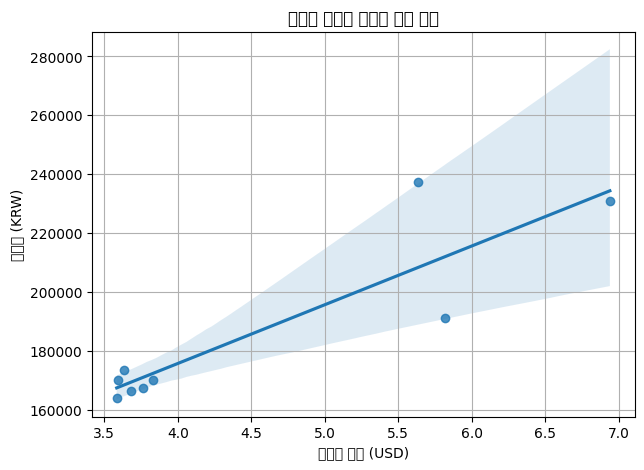

In [12]:
plt.figure(figsize=(7, 5))
sns.regplot(data=yearly, x='corn_price', y='ÏÇ¨Î£åÎπÑ')
plt.title("Ïò•ÏàòÏàò Í∞ÄÍ≤©Í≥º ÏÇ¨Î£åÎπÑ Í∞ÑÏùò Í¥ÄÍ≥Ñ")
plt.xlabel("Ïò•ÏàòÏàò Í∞ÄÍ≤© (USD)")
plt.ylabel("ÏÇ¨Î£åÎπÑ (KRW)")
plt.grid(True)
plt.show()


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungy

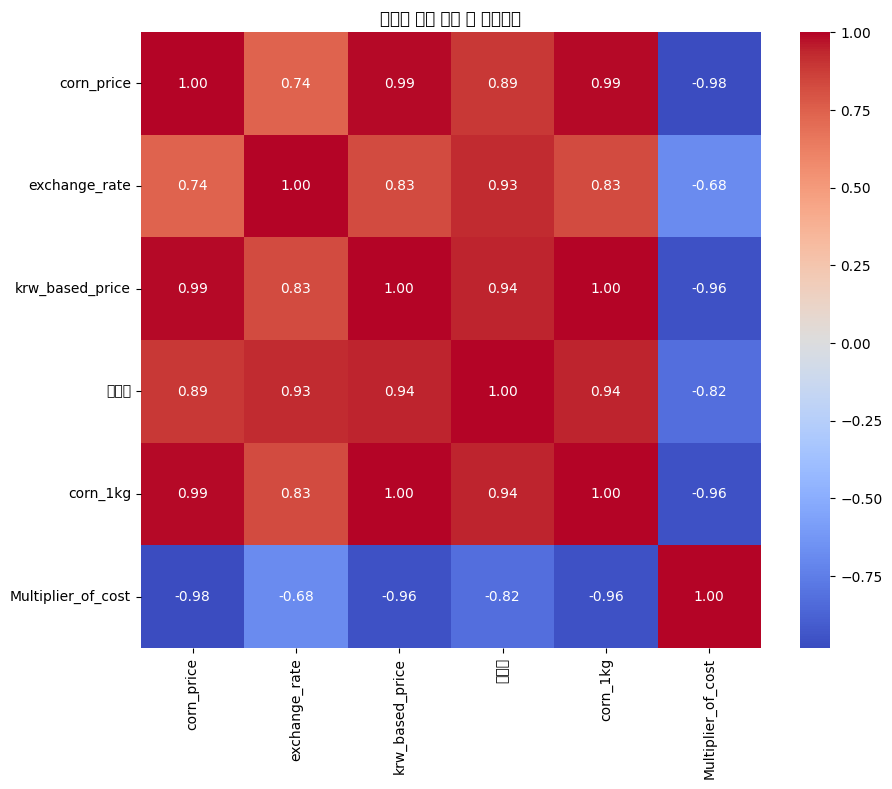

In [8]:
plt.figure(figsize=(10, 8))
corr = yearly.drop(columns='year').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ïó∞ÎèÑÎ≥Ñ Ï£ºÏöî Î≥ÄÏàò Í∞Ñ ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ")
plt.show()


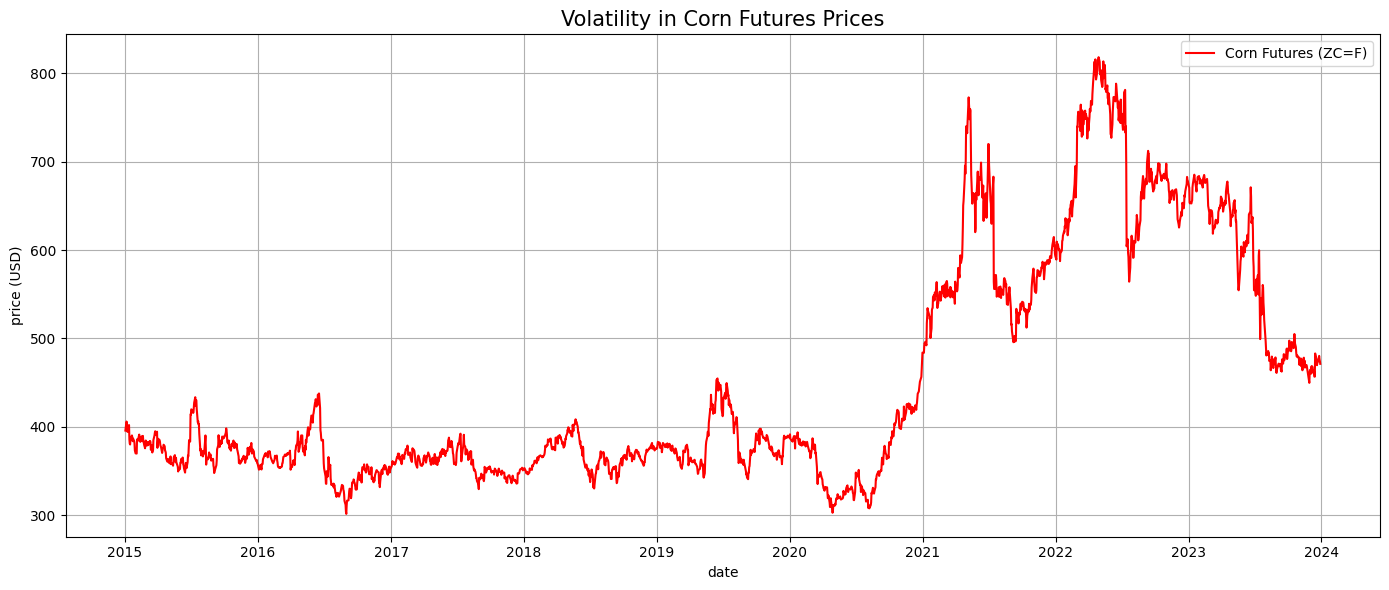

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt

ticker = yf.Ticker("ZC=F")

data = ticker.history(period="11y").loc["2015-01-01":"2023-12-31"]

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Corn Futures (ZC=F)', color='red')

plt.title("Volatility in Corn Futures Prices", fontsize=15)
plt.xlabel("date")
plt.ylabel("price (USD)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_51051/510973492.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  corn_data['Year-Month'] = corn_data['Date'].dt.to_period('M')
/tmp/ipykernel_51051/510973492.py:54: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/510973492.py:54: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/510973492.py:54: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/510973492.py:54: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/510973492.py:54: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/510973492.py:54: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEO

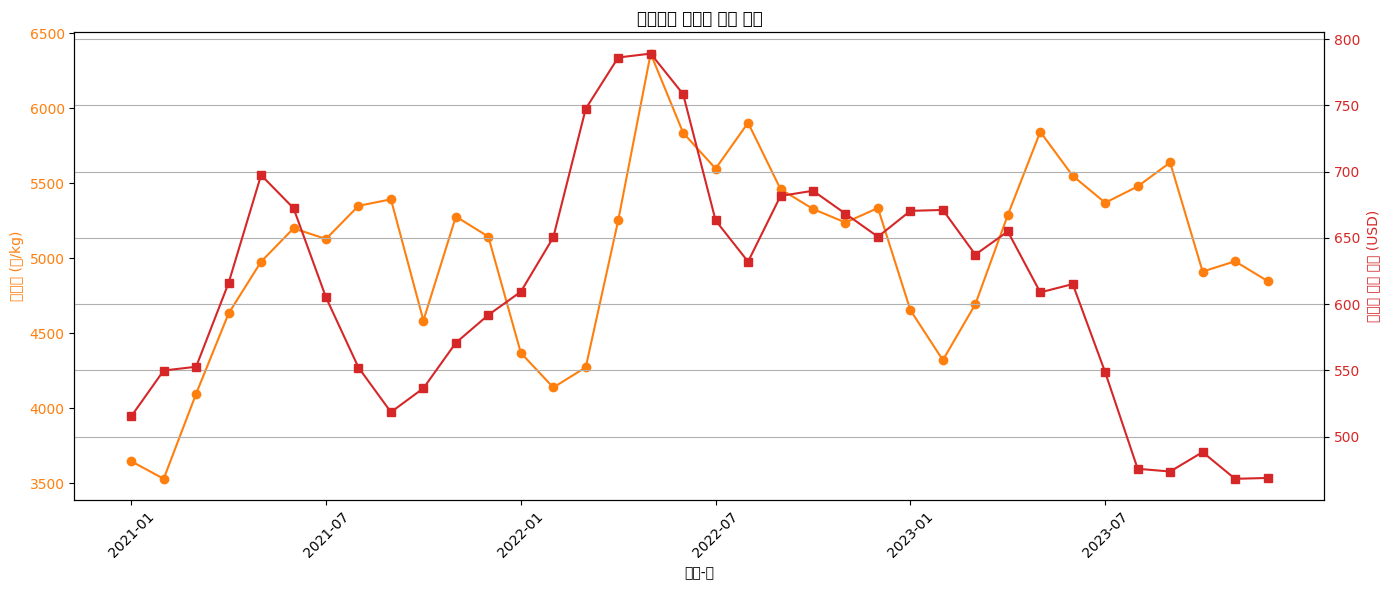

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. ÎèÑÏ∂ïÍ∞Ä Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï†ÑÏ≤òÎ¶¨
file_path = '/home/sungyoon/project_file/report.xltx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names

all_data = []
for sheet in sheet_names:
    try:
        df = pd.read_excel(file_path, sheet_name=sheet)
        df = df[df['Í≤ΩÎùΩÏùºÏûê'].notna()].copy()
        df['Í≤ΩÎùΩÏùºÏûê'] = pd.to_datetime(df['Í≤ΩÎùΩÏùºÏûê'], errors='coerce')
        df['ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)'] = pd.to_numeric(df['ÌèâÍ∑†'].astype(str).str.replace(',', ''), errors='coerce')
        all_data.append(df[['Í≤ΩÎùΩÏùºÏûê', 'ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)']])
    except:
        continue

merged_df = pd.concat(all_data).dropna().reset_index(drop=True)
merged_df['Ïó∞ÎèÑ-Ïõî'] = merged_df['Í≤ΩÎùΩÏùºÏûê'].dt.to_period('M')
monthly_avg = merged_df.groupby('Ïó∞ÎèÑ-Ïõî')['ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)'].mean().reset_index()
monthly_avg['Ïó∞ÎèÑ-Ïõî'] = monthly_avg['Ïó∞ÎèÑ-Ïõî'].astype(str)

# 2. Ïò•ÏàòÏàò ÏÑ†Î¨º Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ (Ïòà: data Î≥ÄÏàòÎ°ú Ï°¥Ïû¨ÌïúÎã§Í≥† Í∞ÄÏ†ï)
corn_data = data[['Close']].copy()
corn_data['Date'] = corn_data.index
corn_data['Year-Month'] = corn_data['Date'].dt.to_period('M')
corn_monthly_avg = corn_data.groupby('Year-Month')['Close'].mean().reset_index()
corn_monthly_avg['Year-Month'] = corn_monthly_avg['Year-Month'].astype(str)

# 3. Î≥ëÌï© Î∞è 2021ÎÖÑ Ïù¥ÌõÑ ÌïÑÌÑ∞ÎßÅ
combined_data = pd.merge(monthly_avg, corn_monthly_avg, left_on='Ïó∞ÎèÑ-Ïõî', right_on='Year-Month', how='inner')
combined_data = combined_data[combined_data['Ïó∞ÎèÑ-Ïõî'] >= '2021-01']

# 4. Í∑∏ÎûòÌîÑ (ÎèÑÏ∂ïÍ∞Ä vs Ïò•ÏàòÏàò ÏÑ†Î¨º)
fig, ax1 = plt.subplots(figsize=(14, 6))

color1 = 'tab:orange'
ax1.set_xlabel('Ïó∞ÎèÑ-Ïõî')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)', color=color1)
ax1.plot(combined_data['Ïó∞ÎèÑ-Ïõî'], combined_data['ÌèâÍ∑†Í∞ÄÍ≤©(Ïõê/kg)'], marker='o', linestyle='-', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(combined_data['Ïó∞ÎèÑ-Ïõî'][::6])
ax1.set_xticklabels(combined_data['Ïó∞ÎèÑ-Ïõî'][::6], rotation=45)

ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Ïò•ÏàòÏàò ÏÑ†Î¨º Í∞ÄÍ≤© (USD)', color=color2)
ax2.plot(combined_data['Ïó∞ÎèÑ-Ïõî'], combined_data['Close'], marker='s', linestyle='-', color=color2)  # ‚Üê Ïã§ÏÑ†ÏúºÎ°ú ÏàòÏ†ïÎê®
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('ÎèÑÏ∂ïÍ∞ÄÏôÄ Ïò•ÏàòÏàò ÏÑ†Î¨º Í∞ÄÍ≤©')
fig.tight_layout()
plt.grid(True)
plt.show()


/tmp/ipykernel_51051/108320373.py:51: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/108320373.py:51: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/108320373.py:51: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/108320373.py:51: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/108320373.py:51: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/108320373.py:51: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_51051/108320373.py:51: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.tight_la

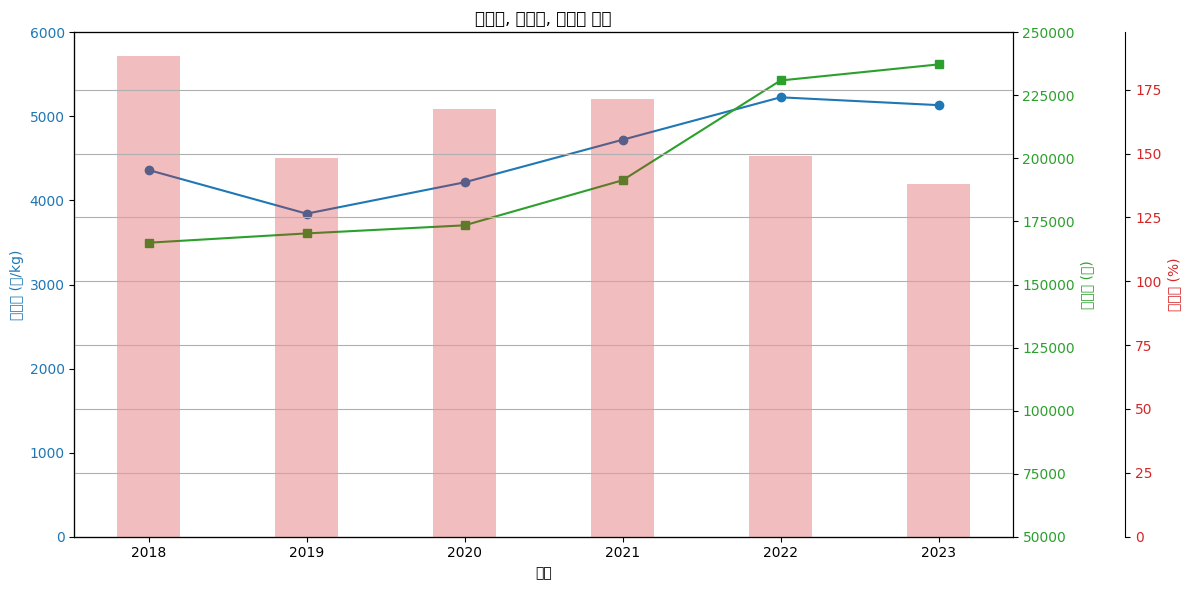

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
Ï∂úÌïòÏ≤¥Ï§ë = 110

df_price_filtered = pd.DataFrame({
    'Ïó∞ÎèÑ': [2018, 2019, 2020, 2021, 2022, 2023],
    'ÎèÑÏ∂ïÍ∞Ä': [4362, 3843, 4216, 4722, 5227, 5134]
})

yearly_feed_filtered = pd.DataFrame({
    'year': [2018, 2019, 2020, 2021, 2022, 2023],
    'ÏÇ¨Î£åÎπÑ': [166581.4, 170268.0, 173476.6, 191343.0, 230910.4, 237279.8]
})

# Ïó∞ÎèÑ Í∏∞Ï§Ä Î≥ëÌï© Î∞è ÏàòÏùµÎ•† Í≥ÑÏÇ∞
df_merged = df_price_filtered.merge(yearly_feed_filtered, left_on='Ïó∞ÎèÑ', right_on='year')
df_merged['ÏàòÏùµÎ•†'] = ((df_merged['ÎèÑÏ∂ïÍ∞Ä'] * Ï∂úÌïòÏ≤¥Ï§ë - df_merged['ÏÇ¨Î£åÎπÑ']) / df_merged['ÏÇ¨Î£åÎπÑ']) * 100

# üìä Ïù¥Ï§ë yÏ∂ï Í∑∏ÎûòÌîÑ
fig, ax1 = plt.subplots(figsize=(12, 6))

# ÎèÑÏ∂ïÍ∞Ä (ÏôºÏ™Ω yÏ∂ï)
color1 = 'tab:blue'
ax1.set_xlabel('Ïó∞ÎèÑ')
ax1.set_ylabel('ÎèÑÏ∂ïÍ∞Ä (Ïõê/kg)', color=color1)
ax1.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÎèÑÏ∂ïÍ∞Ä'], marker='o', linestyle='-', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_merged['Ïó∞ÎèÑ'])

# ÏÇ¨Î£åÎπÑ (Ïò§Î•∏Ï™Ω yÏ∂ï)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('ÏÇ¨Î£åÎπÑ (Ïõê)', color=color2)
ax2.plot(df_merged['Ïó∞ÎèÑ'], df_merged['ÏÇ¨Î£åÎπÑ'], marker='s', linestyle='-', color=color2)  # ‚Üê Ïã§ÏÑ†ÏúºÎ°ú Î≥ÄÍ≤Ω
ax2.tick_params(axis='y', labelcolor=color2)

# ÏàòÏùµÎ•† (ÎßâÎåÄÍ∑∏ÎûòÌîÑ, ÏÑ∏ Î≤àÏß∏ Ï∂ï)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(("axes", 1.12))
color3 = 'tab:red'
ax3.bar(df_merged['Ïó∞ÎèÑ'], df_merged['ÏàòÏùµÎ•†'], alpha=0.3, color=color3, width=0.4)
ax3.set_ylabel('ÏàòÏùµÎ•† (%)', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)

# Ï†úÎ™© Î∞è ÎßàÎ¨¥Î¶¨
plt.title('ÎèÑÏ∂ïÍ∞Ä, ÏÇ¨Î£åÎπÑ, ÏàòÏùµÎ•† Î≥ÄÌôî')
ax1.set_ylim(0, 6000)
ax2.set_ylim(50000, 250000)
fig.tight_layout()
plt.grid(True)
plt.show()
